In [1]:
# Load Labraries
import matplotlib.pyplot as plt
import seaborn
import scikitplot as skplt
import pandas
import numpy as np
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import ensemble

# SMOTE, under_sampling and over_sampling
#pip install imbalanced-learn
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.pipeline import Pipeline

# PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# GridSearch
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

In [2]:
dataset = pandas.read_csv("C:\Jon\Course\TP\SwDevAppliedAI\9 MachineLearningForDeveloper\Dataset\IBMAttrition\WA_Fn-UseC_-HR-Employee-Attrition_clean.csv")

In [3]:
# shape
dataset.shape

(1470, 31)

In [4]:
# head
dataset.head()  #default is 5 rows if not specified

,Attrition,Age,MonthlyIncome,PercentSalaryHike,PerformanceRating,JobLevel,TotalWorkingYears,Education,EnvironmentSatisfaction,TrainingTimesLastYear,...,Gender,OverTime,EducationField,BusinessTravel,Department,MaritalStatus,JobRole,HourlyRate,DailyRate,MonthlyRate
0,1,41,5993,11,3,2,8,2,2,0,...,0,1,Life Sciences,Travel_Rarely,Sales,Single,Sales Executive,94,1102,19479
1,0,49,5130,23,4,2,10,1,3,3,...,1,0,Life Sciences,Travel_Frequently,Research & Development,Married,Research Scientist,61,279,24907
2,1,37,2090,15,3,1,7,2,4,3,...,1,1,Other,Travel_Rarely,Research & Development,Single,Laboratory Technician,92,1373,2396
3,0,33,2909,11,3,1,8,4,4,3,...,0,1,Life Sciences,Travel_Frequently,Research & Development,Married,Research Scientist,56,1392,23159
4,0,27,3468,12,3,1,6,1,1,3,...,1,0,Medical,Travel_Rarely,Research & Development,Married,Laboratory Technician,40,591,16632


In [5]:
# statistical description
dataset.describe()

,Attrition,Age,MonthlyIncome,PercentSalaryHike,PerformanceRating,JobLevel,TotalWorkingYears,Education,EnvironmentSatisfaction,TrainingTimesLastYear,...,NumCompaniesWorked,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Gender,OverTime,HourlyRate,DailyRate,MonthlyRate
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,0.161224,36.923810,6502.931293,15.209524,3.153741,2.063946,11.279592,2.912925,2.721769,2.799320,...,2.693197,7.008163,4.229252,2.187755,4.123129,0.600000,0.282993,65.891156,802.485714,14313.103401
std,0.367863,9.135373,4707.956783,3.659938,0.360824,1.106940,7.780782,1.024165,1.093082,1.289271,...,2.498009,6.126525,3.623137,3.222430,3.568136,0.490065,0.450606,20.329428,403.509100,7117.786044
min,0.000000,18.000000,1009.000000,11.000000,3.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,102.000000,2094.000000
25%,0.000000,30.000000,2911.000000,12.000000,3.000000,1.000000,6.000000,2.000000,2.000000,2.000000,...,1.000000,3.000000,2.000000,0.000000,2.000000,0.000000,0.000000,48.000000,465.000000,8047.000000
50%,0.000000,36.000000,4919.000000,14.000000,3.000000,2.000000,10.000000,3.000000,3.000000,3.000000,...,2.000000,5.000000,3.000000,1.000000,3.000000,1.000000,0.000000,66.000000,802.000000,14235.500000
75%,0.000000,43.000000,8379.000000,18.000000,3.000000,3.000000,15.000000,4.000000,4.000000,3.000000,...,4.000000,9.000000,7.000000,3.000000,7.000000,1.000000,1.000000,83.750000,1157.000000,20461.500000
max,1.000000,60.000000,19999.000000,25.000000,4.000000,5.000000,40.000000,5.000000,4.000000,6.000000,...,9.000000,40.000000,18.000000,15.000000,17.000000,1.000000,1.000000,100.000000,1499.000000,26999.000000


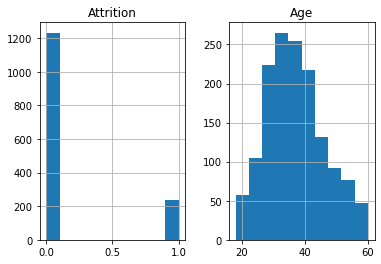

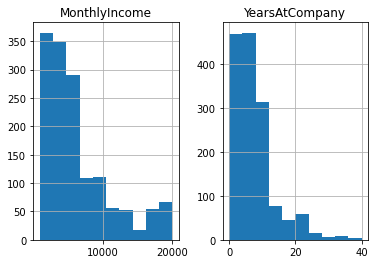

In [6]:
# histogram
dataset.hist(['Attrition','Age'])
plt.show()
dataset.hist(['MonthlyIncome','YearsAtCompany'])
plt.show()

In [7]:
# JobRole and JobLevel are similar in nature describing a job function and it seniority.
# Drop JobRole since it has more discrete level and will generate more columns after one-hot encoding

# Hourly Rate, DailyRate and MonthlyRate are drop since Monthly Income is sufficient to indicate an employee income.

# Remove columns that is similiar in nature
notUsefulFeatureList = dataset[['HourlyRate', 'DailyRate', 'MonthlyRate','JobRole']]
for col in notUsefulFeatureList:
    del dataset[col]

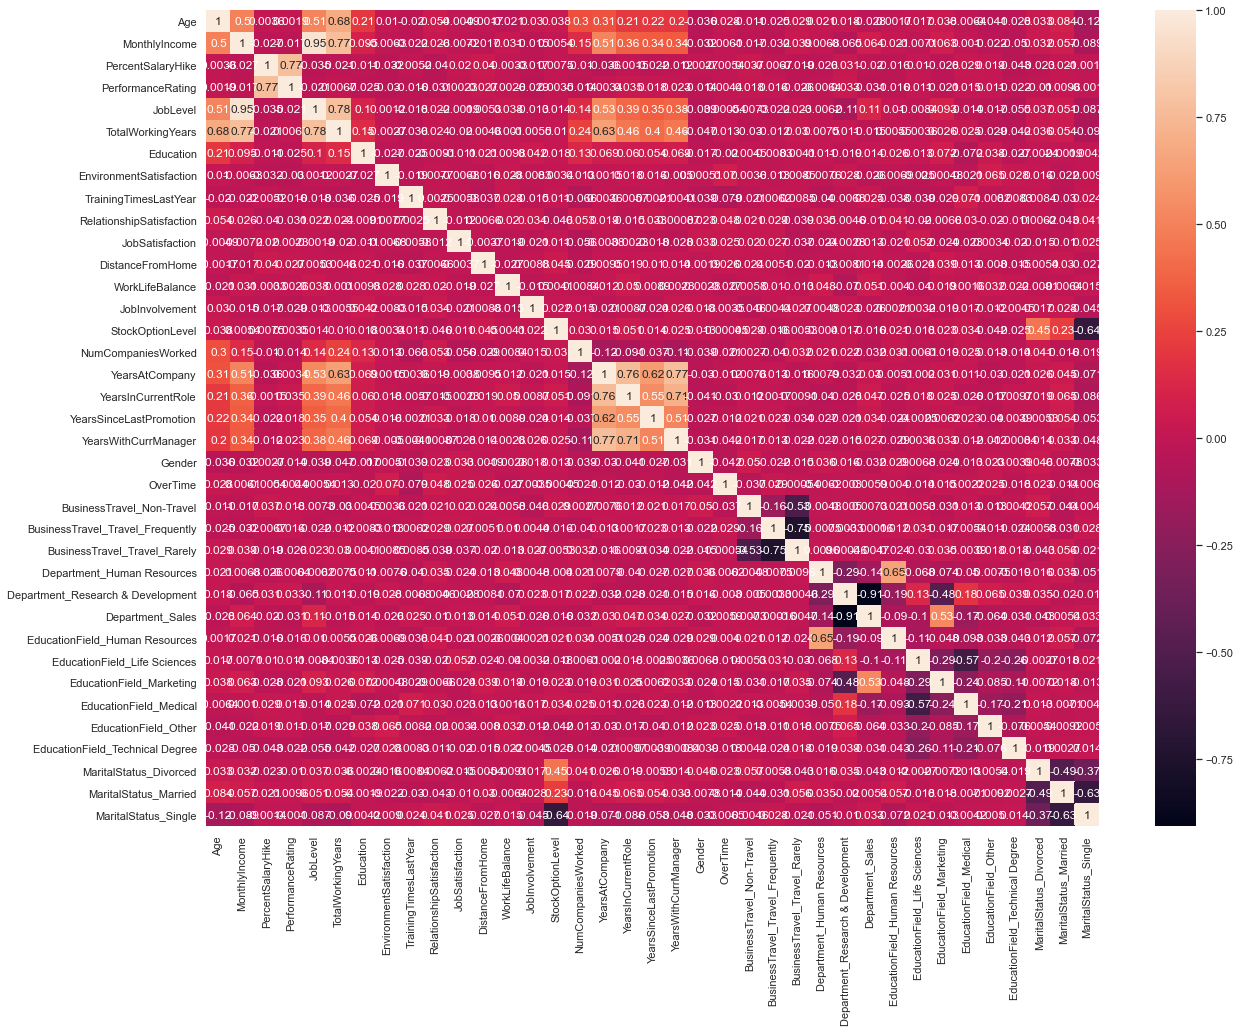

In [8]:
#Replace categorical data with one-hot encoded data
features_with_OHE = pandas.get_dummies(dataset, columns=['BusinessTravel','Department','EducationField','MaritalStatus'])

#remove the depedent parameter
del features_with_OHE['Attrition']

correlation_mat = features_with_OHE.corr()
seaborn.set(font_scale = 1)
plt.subplots(figsize = (20,15))
seaborn.heatmap(correlation_mat, annot = True)
plt.show()

Variance explained by all 37 principal components = 99.99999999999999
Variance explained by the all principal component = 12.712614653856475
Variance explained by the First 2 principal component = 25.0620490330459
Variance explained by the First 3 principal component = 30.322105827004457
Variance explained by the First 15 principal component = 73.97974826510656
Variance explained by the First 20 principal component = 86.72231824661873
Variance explained by the First 25 principal component = 95.65256279986663


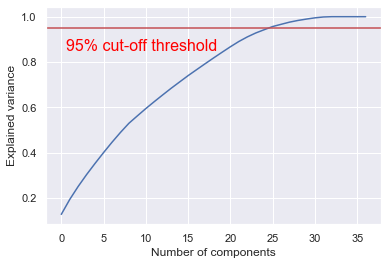

In [9]:
# apply normalization
#scaler = MinMaxScaler()
scaler = StandardScaler()

#Calculate the mean and standard deviation and transform the values
scaled_features = scaler.fit_transform(features_with_OHE)

from sklearn.decomposition import PCA
pca_37 = PCA(n_components = 37, random_state=2020)
pca_37.fit(scaled_features)
X_pca_37 = pca_37.transform(scaled_features)

print("Variance explained by all 37 principal components =",
     sum(pca_37.explained_variance_ratio_ * 100))

pca_37.explained_variance_ratio_ * 100

np.cumsum(pca_37.explained_variance_ratio_ * 100)

plt.plot(np.cumsum(pca_37.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
percentline = 95
plt.axhline(y=percentline/100, color='r', linestyle='-')
msg = "%d%% cut-off threshold" % (percentline)
#plt.text(0.5, (percentline/100)-0.1,'95% cut-off threshold', color = 'red', fontsize=16)
plt.text(0.5, (percentline/100)-0.1,msg, color = 'red', fontsize=16)
plt.savefig('elbow_plot.png', dpi=100)

print("Variance explained by the all principal component =",
      np.cumsum(pca_37.explained_variance_ratio_ * 100)[0])
print("Variance explained by the First 2 principal component =",
      np.cumsum(pca_37.explained_variance_ratio_ * 100)[2])
print("Variance explained by the First 3 principal component =",
      np.cumsum(pca_37.explained_variance_ratio_ * 100)[3])
print("Variance explained by the First 15 principal component =",
      np.cumsum(pca_37.explained_variance_ratio_ * 100)[15])
print("Variance explained by the First 20 principal component =",
      np.cumsum(pca_37.explained_variance_ratio_ * 100)[20])
print("Variance explained by the First 25 principal component =",
      np.cumsum(pca_37.explained_variance_ratio_ * 100)[25])

In [10]:
#Using 95% explianed variance, number of components = 25
pca = PCA(n_components=25, random_state=2020)
pca.fit(scaled_features)
X_pca = pca.transform(scaled_features)

pca_25 = pandas.DataFrame(data = X_pca
             , columns = ['pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8','pca9','pca10',
                          'pca11','pca12','pca13','pca14','pca15','pca16','pca17','pca18','pca19','pca20',
                          'pca21','pca22','pca23','pca24','pca25'])

In [11]:
pca_final = pandas.concat([dataset[['Attrition']],pca_25], axis = 1)
pca_final

,Attrition,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,...,pca16,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24,pca25
0,1,-0.357380,1.611702,-1.360875,-1.878652,0.569861,0.048995,-0.962455,-1.736304,0.303496,...,0.941339,-2.084330,-1.572622,-0.471414,-0.496162,1.380827,-1.012054,2.198363,0.651242,-0.536234
1,0,0.571718,-1.598657,-0.303212,3.017534,-0.861812,2.187347,0.232282,-1.253515,-0.951087,...,-0.868609,-0.342797,1.429605,1.079721,-0.248052,-0.951003,-0.452305,-0.150510,-0.934919,-1.586046
2,1,-2.733512,-0.579337,-1.197335,-2.151718,0.421018,0.413676,-0.207022,0.459461,0.426522,...,0.191302,-0.519873,-0.001590,0.926602,-0.459133,0.229663,0.160595,1.964941,-0.659656,-0.099762
3,0,-0.852607,-0.836143,-0.643276,1.405034,1.216875,-1.129177,0.122734,-1.744324,-1.908824,...,0.853139,0.213976,-1.414433,-0.504539,-0.163057,-0.314796,0.878445,-0.470125,0.005426,0.270929
4,0,-1.872094,-1.011826,1.353007,-1.223972,-0.085142,-0.688394,0.315402,1.354853,-1.393152,...,-0.997223,-0.847800,0.778241,0.480163,-1.463586,0.393190,-1.059081,2.082020,-0.724507,0.964831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,-0.756265,-1.308324,0.663631,1.441815,0.841997,0.248564,-0.349479,1.169244,-2.513629,...,-1.818999,0.698301,0.482514,-0.644067,1.702444,-0.189155,-0.978537,0.639497,-0.479315,-0.269344
1466,0,0.841935,-1.141428,0.911730,-0.721327,-1.110871,-0.753005,0.717723,1.487673,-0.958512,...,0.725616,-1.374759,1.298192,0.451009,1.525585,-0.721872,0.652062,0.822036,-0.636361,-0.196822
1467,0,-1.194628,-1.119407,0.903918,0.277289,-1.988249,1.822681,0.385531,-1.880616,-0.031456,...,-0.998833,-1.478773,0.387811,-1.236970,-0.387986,1.788059,1.172670,-0.682726,0.202516,0.672548
1468,0,1.127345,1.132128,-0.363526,1.372219,1.040419,-0.200851,-0.032911,1.161025,-2.286385,...,-0.515872,-1.398962,-0.115858,1.211642,-0.278859,-2.026690,-0.103791,-0.124596,1.185824,-2.322200


In [12]:
# Split out validation dataset
X = pca_final.iloc[:,1:]  # All rows and column 1 to last column
Y = pca_final.iloc[:,0]    # All rows and column 0 only (Attrition)

# Use SMOTE to balance the dataset
oversample = SMOTE(k_neighbors=4)
X,Y=oversample.fit_resample(X,Y)

validation_size = 0.2  #validation is for testing
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size = validation_size, random_state = seed)

SVM Accuracy:
0.9190283400809717

SVM Confusion_matrix:
[[216  21]
 [ 19 238]]

SVM Classification report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       237
           1       0.92      0.93      0.92       257

    accuracy                           0.92       494
   macro avg       0.92      0.92      0.92       494
weighted avg       0.92      0.92      0.92       494

SVM


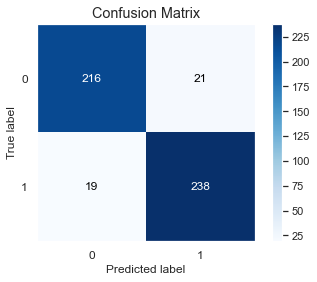


GBC Accuracy:
0.854251012145749

GBC Confusion_matrix:
[[194  43]
 [ 29 228]]

GBC Classification report:
              precision    recall  f1-score   support

           0       0.87      0.82      0.84       237
           1       0.84      0.89      0.86       257

    accuracy                           0.85       494
   macro avg       0.86      0.85      0.85       494
weighted avg       0.86      0.85      0.85       494

GBC


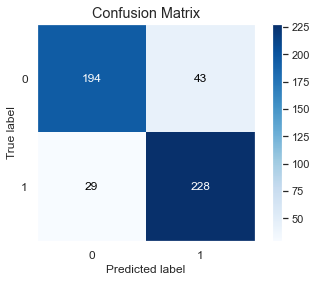


RFC Accuracy:
0.9048582995951417

RFC Confusion_matrix:
[[209  28]
 [ 19 238]]

RFC Classification report:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       237
           1       0.89      0.93      0.91       257

    accuracy                           0.90       494
   macro avg       0.91      0.90      0.90       494
weighted avg       0.91      0.90      0.90       494

RFC


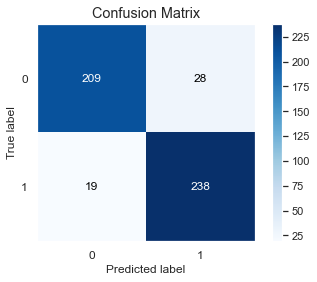

In [13]:
#Test options and evaluation metric
scoring = 'accuracy'

# Spot Check Algo
models = []

# SVM parameters
#{'cache_size': 200, 'class_weight': 'balanced', 'decision_function_shape': 'ovr', 
#'degree': 5, 'gamma': 'auto', 'kernel': 'poly', 'shrinking': False}
mdl = SVC(
    gamma                   = 'auto',
    kernel                  = 'poly',
    degree                  = 5,
    cache_size              = 200,
    shrinking               = False,
    class_weight            = None,
    decision_function_shape = 'ovr',
    random_state            = seed
)
models.append(('SVM', mdl))

# GBC parameters :- loss'deviance' or 'exponential'
mdl = ensemble.GradientBoostingClassifier(
    n_estimators     = 1000,  # how many decision trees to build
    learning_rate    = 0.01, # how many decision tress influence overall prediction
    max_depth        = 4,
    min_samples_leaf = 17,
    max_features     = 0.1,
    loss             = 'deviance',
    random_state     = seed
)
models.append(('GBC', mdl))

# RFC parameters :- criterion='gini' or 'entropy, n_jobs=-1 mean use all processor'
mdl = ensemble.RandomForestClassifier(
    n_estimators     = 3000, #how many decision trees to build
    criterion        = "entropy",
    max_depth        = None,
    min_samples_leaf = 3,
    max_features     = 0.3,
    n_jobs           = -1,
    random_state     = seed
)
models.append(('RFC', mdl))

#evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
#    msg = "%s: mean(%f) std(%f)" % (name, cv_results.mean(), cv_results.std())
#    print(msg)
    
    # Make predictions on validation dataset
    model.fit(X_train, Y_train)
    predictions = model.predict(X_validation)
    
    print(name + " Accuracy:")
    print(accuracy_score(Y_validation, predictions))
    print()
    print(name + " Confusion_matrix:")
    print(confusion_matrix(Y_validation, predictions))  #Y-axis is Actual, X-axis is Prediction
    print()
    print(name + " Classification report:")
    print(classification_report(Y_validation, predictions))
    
    seaborn.set(font_scale = 1)
    print(name)
    skplt.metrics.plot_confusion_matrix(Y_validation, predictions)
    plt.show()
    print()

In [14]:
#Perform Grid Search

model = SVC(
    gamma                   = 'auto',
    kernel                  = 'poly',
    degree                  = 5,
    cache_size              = 200,
    shrinking               = True,
    class_weight            = None,
    decision_function_shape = 'ovr',
    random_state            = seed
)


# Parameters we want to try
param_grid = {
    'kernel':['linear','poly', 'rbf','sigmoid'],
    'gamma':['scale','auto'],
    'degree':[3,5,7],
    'shrinking':[False, True],
    'cache_size':[200,500,1000],
    'class_weight':[None, dict],
    'decision_function_shape':['ovr','ovo']
}



'''
model = ensemble.RandomForestClassifier(
    n_estimators     =1000,
    criterion        = "entropy",
    max_depth        = None,
    min_samples_leaf = 3,
    max_features     = 0.3,
    n_jobs           = -1,
    random_state     = seed
)


# Parameters we want to try
param_grid = {
    'n_estimators':[500,1000,3000],
    'criterion':['gini','entropy'],
    'max_depth':[None,4,6],
    'min_samples_leaf':[3,5,9,17],
    'max_features':[0.1, 0.3, 1.0],
}

'''

# Define the grid search we want to run. Run it with all cpus in parallel.
gs_cv = GridSearchCV(model, param_grid, n_jobs=-1, verbose=100)

# Run the grid search - on only the training data!
gs_cv.fit(X_train, Y_train)

# Print the parameters that gave us the best result!
print(gs_cv.best_params_)

# Find the error rate on the training set using the best parameters
mse = mean_absolute_error(Y_train, gs_cv.predict(X_train))
print("Training Set Mean Absolute Error: %.4f" % mse)

# Find the error rate on the test set using the best parameters
mse = mean_absolute_error(Y_validation, gs_cv.predict(X_validation))
print("Test Set Mean Absolute Error: %.4f" % mse)



Fitting 5 folds for each of 576 candidates, totalling 2880 fits


C:\Users\JCJCJC\anaconda3\envs\AI\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.80676862 0.80676862 0.89399987 0.89399987 0.90312922 0.90312922
 0.72310994 0.72310994 0.80676862 0.80676862 0.90668637 0.90668637
 0.91885498 0.91885498 0.68660927 0.68660927 0.80676862 0.80676862
 0.87675127 0.87675127 0.90312922 0.90312922 0.72310994 0.72310994
 0.80676862 0.80676862 0.9350845  0.9350845  0.91885498 0.91885498
 0.68660927 0.68660927 0.80676862 0.80676862 0.81540063 0.81540063
 0.90312922 0.90312922 0.72310994 0.72310994 0.80676862 0.80676862
 0.92747671 0.92747671 0.91885498 0.91885498 0.68660927 0.68660927
 0.80676862 0.80676862 0.89399987 0.89399987 0.90312922 0.90312922
 0.72310994 0.72310994 0.80676862 0.80676862 0.90668637 0.90668637
 0.91885498 0.91885498 0.68660927 0.68660927 0.80676862 0.80676862
 0.87675127 0.87675127 0.90312922 0.90312922 0.72310994 0.72310994
 0.80676862 0.80676862 0.9350845  0.9350845 

{'cache_size': 200, 'class_weight': None, 'decision_function_shape': 'ovr', 'degree': 5, 'gamma': 'auto', 'kernel': 'poly', 'shrinking': False}
Training Set Mean Absolute Error: 0.0137
Test Set Mean Absolute Error: 0.0810
